# Input the libraries

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn import preprocessing, tree
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
import kagglehub
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import time
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.neural_network import MLPClassifier
from joblib import Parallel, delayed
from tqdm import tqdm
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from tabulate import tabulate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from itertools import combinations

# Input our data into kaggle

---



In [ ]:
# Download the dataset using Kaggle Hub
downlod_data = kagglehub.dataset_download('sameepvani/nasa-nearest-earth-objects')
# Read the CSV data from the specified path
read_data = pd.read_csv("/root/.cache/kagglehub/datasets/sameepvani/nasa-nearest-earth-objects/versions/2/neo.csv")
data = pd.DataFrame(read_data)
display(data)


100%|██████████| 6.60M/6.60M [00:00<00:00, 56.2MB/s]

Extracting files...


id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
2       2512244   512244 (2015 YE18)          0.722030          1.614507   
3       3596030          (2012 BV13)          0.096506          0.215794   
4       3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3763337           (2016 VX1)          0.026580          0.059435   
90832   3837603           (2019 AD3)          0.016771          0.037501   
90833  54017201           (2020 JP3)          0.031956          0.071456   
90834  54115824           (2021 CN5)          0.007321          0.016370   
90835  54205447           (2021 TW7)          0.039862          0.089133   

       relative_velocity  miss_distance orbiting_body  sentry_object  \
0           13569.249224   5.483974e+07         Earth          False   
1           73588.726663   6.143813e+07         Earth          False   
2          114258.692129   4.979872e+07         Earth          False   
3           24764.303138   2.543497e+07         Earth          False   
4           42737.733765   4.627557e+07         Earth          False   
...                  ...            ...           ...            ...   
90831       52078.886692   1.230039e+07         Earth          False   
90832       46114.605073   5.432121e+07         Earth          False   
90833        7566.807732   2.840077e+07         Earth          False   
90834       69199.154484   6.869206e+07         Earth          False   
90835       27024.455553   5.977213e+07         Earth          False   

       absolute_magnitude  hazardous  
0                   16.73      False  
1                   20.00       True  
2                   17.83      False  
3                   22.20      False  
4                   20.09       True  
...                   ...        ...  
90831               25.00      False  
90832               26.00      False  
90833               24.60      False  
90834               27.80      False  
90835               24.12      False  

[90836 rows x 10 columns]



*   **id :**  Unique Identifier for each Asteroid
*   **name** : Name given by NASA
*   **est_diameter_min** : Minimum Estimated Diameter in Kilometres
*   **est_diameter_max** : Maximum Estimated Diameter in Kilometres
*   **relative_velocity** : Velocity Relative to Earth
*   **miss_distance** : Distance in Kilometres missed
*   **orbiting_body** : Planet that the asteroid orbits
*   **sentry_object** : Included in sentry - an automated collision monitoring system
*   **absolute_magnitude** : Describes intrinsic luminosity
*   ***hazardous*** : Boolean feature that shows whether asteroid is harmful or not



# **Data preprocessing**

---



In [ ]:
data.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [ ]:
data.describe()

id  est_diameter_min  est_diameter_max  relative_velocity  \
count  9.083600e+04      90836.000000      90836.000000       90836.000000   
mean   1.438288e+07          0.127432          0.284947       48066.918918   
std    2.087202e+07          0.298511          0.667491       25293.296961   
min    2.000433e+06          0.000609          0.001362         203.346433   
25%    3.448110e+06          0.019256          0.043057       28619.020645   
50%    3.748362e+06          0.048368          0.108153       44190.117890   
75%    3.884023e+06          0.143402          0.320656       62923.604633   
max    5.427591e+07         37.892650         84.730541      236990.128088   

       miss_distance  absolute_magnitude  
count   9.083600e+04        90836.000000  
mean    3.706655e+07           23.527103  
std     2.235204e+07            2.894086  
min     6.745533e+03            9.230000  
25%     1.721082e+07           21.340000  
50%     3.784658e+07           23.700000  
75%     5.654900e+07           25.700000  
max     7.479865e+07           33.200000

**Heatmap**

---



<Axes: >

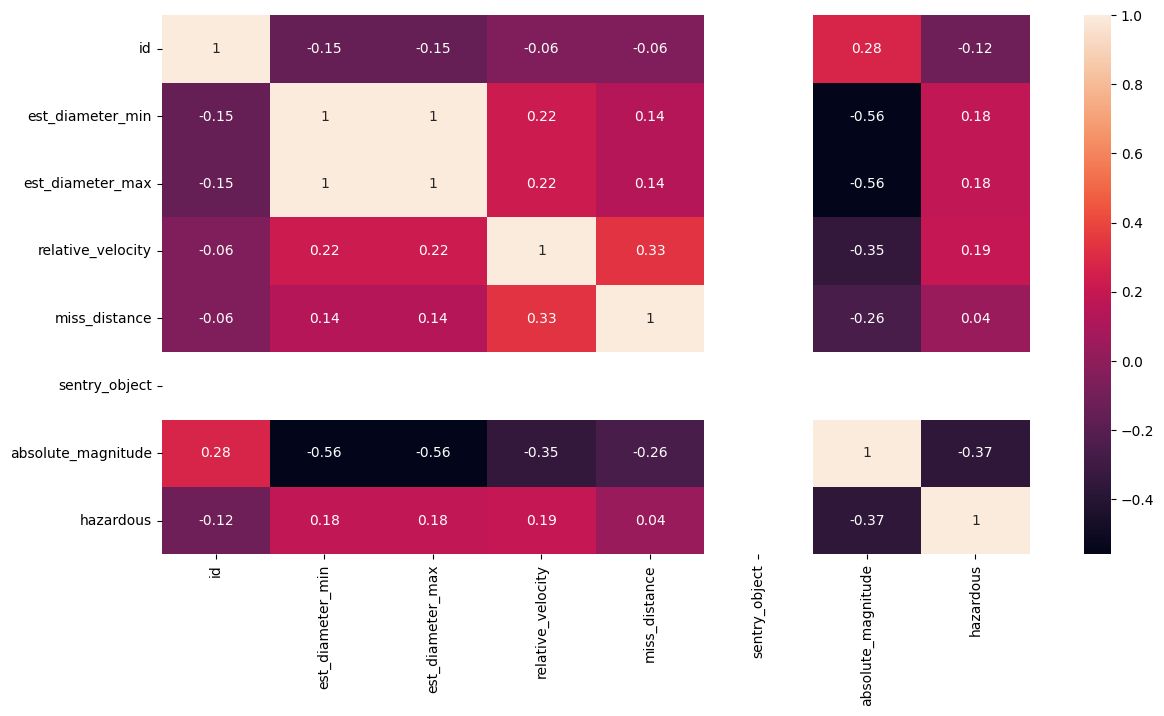

In [ ]:
correlation = data.corr(method='pearson', min_periods=1, numeric_only=True).round(2)
plt.figure(figsize=(14, 7))
sns.heatmap(correlation, annot=True, cmap='rocket')

**Pairplot for raw data**  ⏳

---




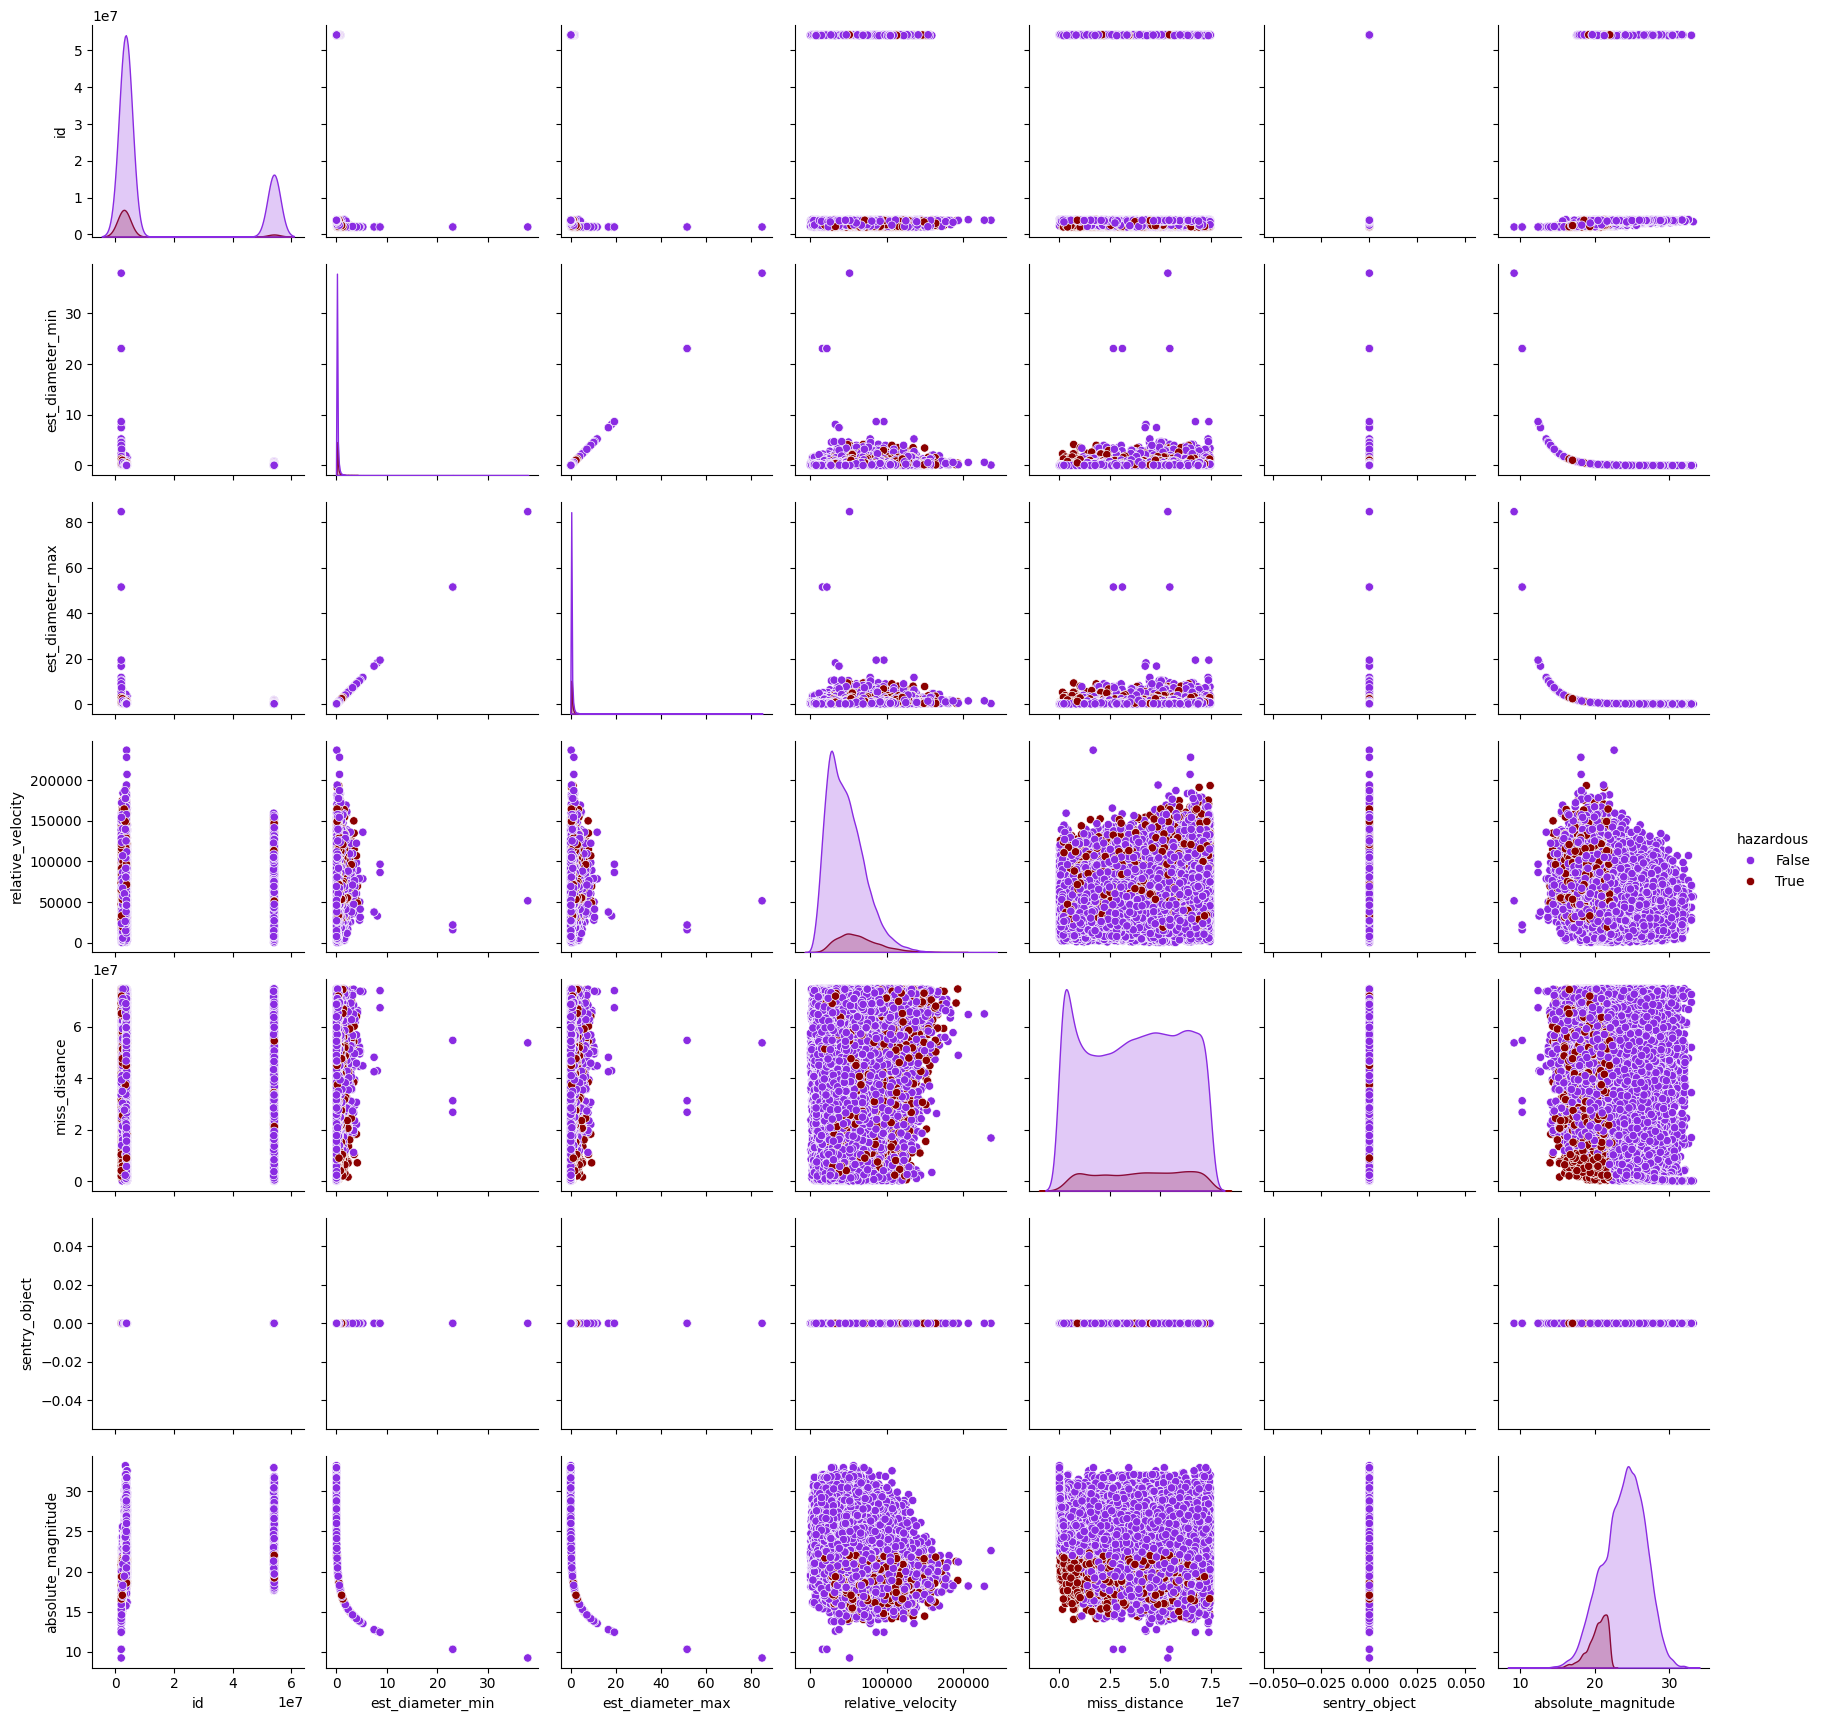

In [ ]:
sns.pairplot(data , hue = 'hazardous', palette= ['#8A2BE2',  '#8B0000'])

<ipython-input-8-5015f2aa85e8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.est_diameter_min, kde=False, color='#66CDAA')
<ipython-input-8-5015f2aa85e8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.est_diameter_max, kde=False, color='#66CDAA')
<ipython-input-8-5015f2aa85e8>:9: 

<Axes: xlabel='absolute_magnitude'>

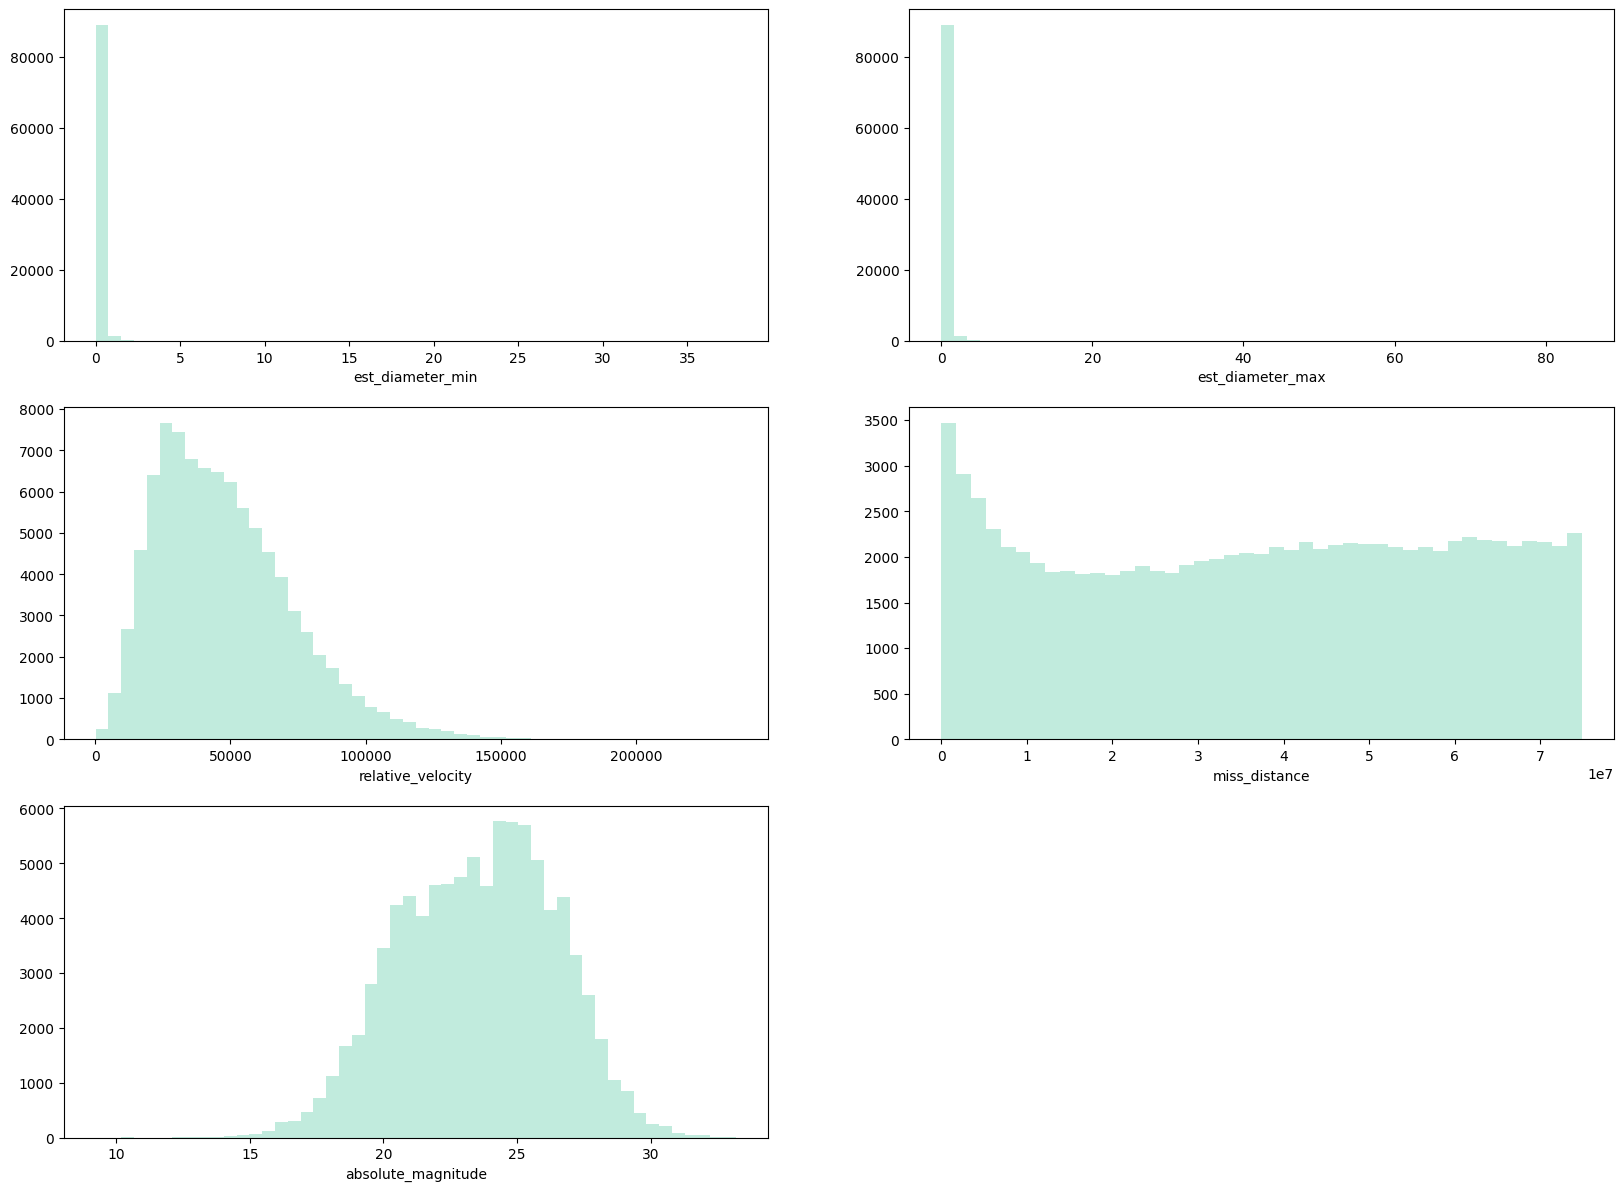

In [ ]:
plt.figure(figsize=(20, 25))
plt.subplot(5, 2, 1)
sns.distplot(data.est_diameter_min, kde=False, color='#66CDAA')

plt.subplot(5, 2, 2)
sns.distplot(data.est_diameter_max, kde=False, color='#66CDAA')

plt.subplot(5, 2, 3)
sns.distplot(data.relative_velocity, kde=False, color='#66CDAA')

plt.subplot(5, 2, 4)
sns.distplot(data.miss_distance, kde=False, color='#66CDAA')

plt.subplot(5, 2, 5)
sns.distplot(data.absolute_magnitude, kde=False, color='#66CDAA')

In [ ]:
count_3 = [
    data.groupby(['orbiting_body'])['orbiting_body'].count(),

    data.groupby(['sentry_object'])['sentry_object'].count()
]

In [ ]:
print(count_3)

[orbiting_body
Earth    90836
Name: orbiting_body, dtype: int64, sentry_object
False    90836
Name: sentry_object, dtype: int64]


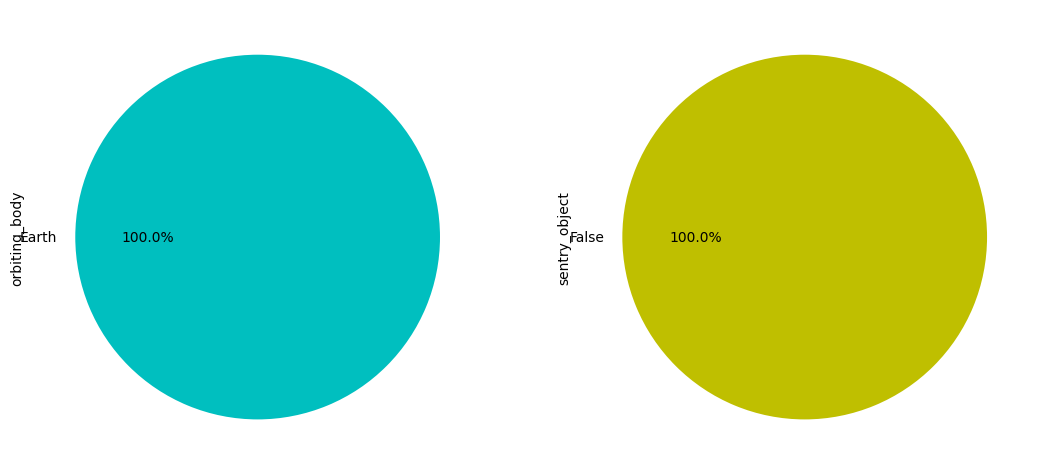

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)

count_3[0].plot(kind='pie', ax=ax1, autopct='%1.1f%%', figsize=(20, 20), fontsize=10, colors="cyan")
count_3[1].plot(kind='pie', ax=ax2, autopct='%1.1f%%', figsize=(20, 20), fontsize=10, colors="yellow")

plt.show()

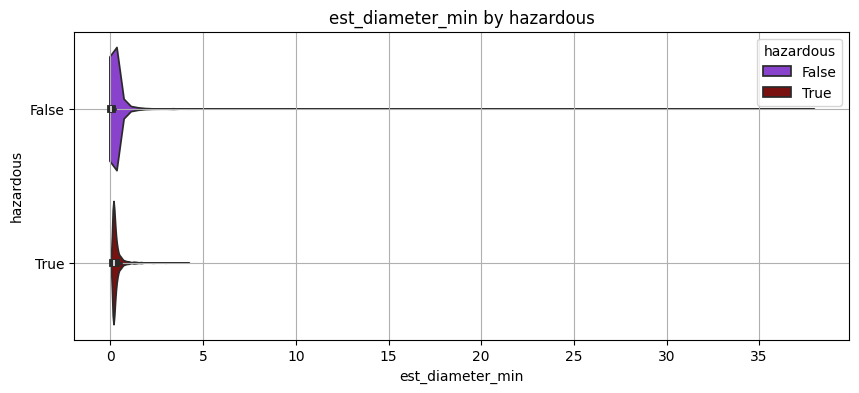

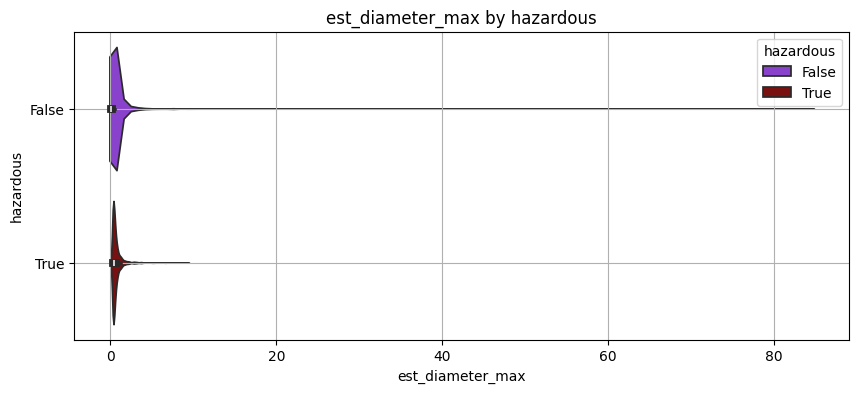

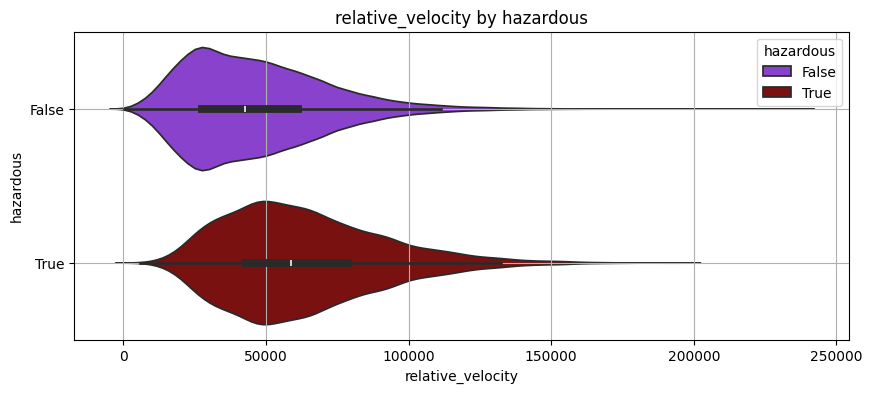

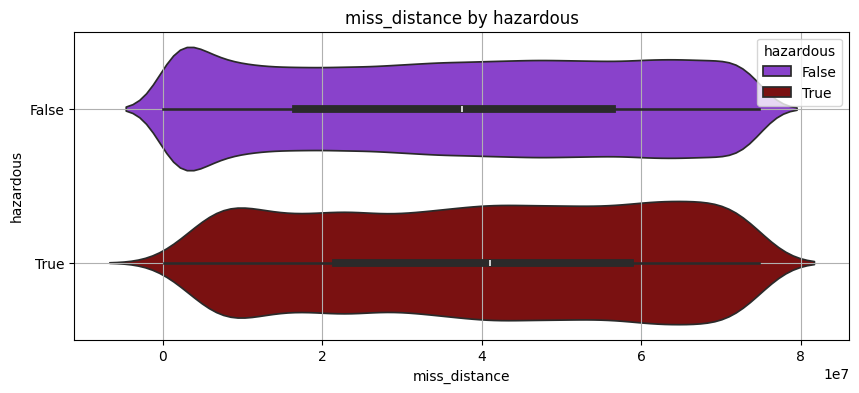

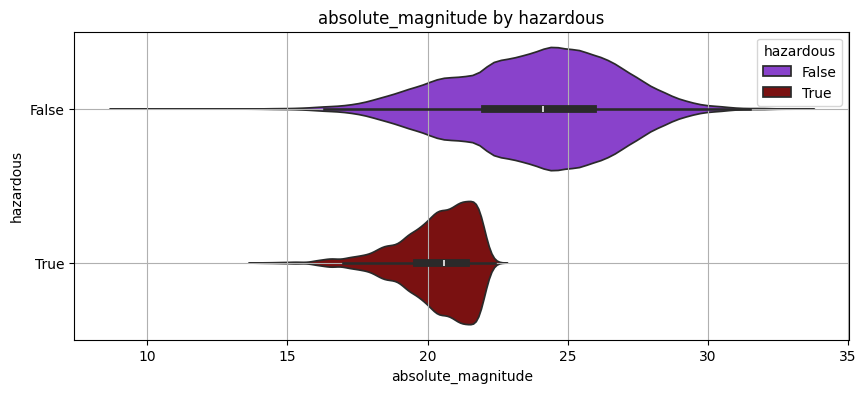

In [ ]:
features = ['est_diameter_min', 'est_diameter_max',
            'relative_velocity', 'miss_distance',
            'absolute_magnitude']

for f in features:
    plt.figure(figsize=(10, 4))
    sns.violinplot(data=data, x=f, y='hazardous', orient='h', hue='hazardous', palette=['#8A2BE2', '#8B0000'])
    my_title = f + ' by hazardous'
    plt.title(my_title)
    plt.grid()

In [ ]:
data.drop(["id", "name", "orbiting_body", "sentry_object", "est_diameter_min"], axis=1, inplace=True)

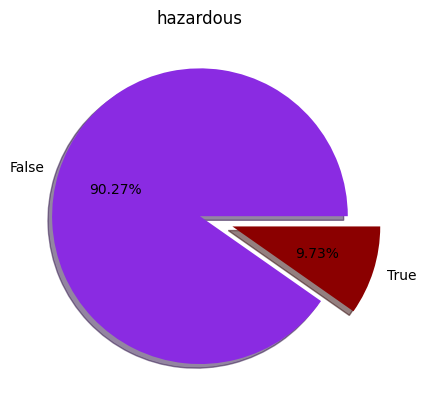

In [ ]:
explode = (0, 0.23)
plt.pie(data['hazardous'].value_counts(), labels=['False', 'True'], autopct='%1.2f%%',
        explode=explode, shadow=True, colors=['#8A2BE2', '#8B0000'])
plt.title('hazardous')
plt.show()

**Train Test Split**

In [ ]:
data_train, test_data = train_test_split(data, test_size=0.15, random_state=42)
data_analyses, val_data = train_test_split(data_train, test_size=0.17, random_state=42)

In [ ]:
print(test_data.hazardous.value_counts())
print(data_analyses.hazardous.value_counts())
print(val_data.hazardous.value_counts())

hazardous
False    12340
True      1286
Name: count, dtype: int64
hazardous
False    57810
True      6274
Name: count, dtype: int64
hazardous
False    11846
True      1280
Name: count, dtype: int64


**Check and remove outlier data**

---



In [ ]:
data_noise = data_analyses

In [ ]:
lowoutliers = data_analyses.absolute_magnitude.quantile(0.75) + (data_analyses.absolute_magnitude.quantile(0.75) - data_analyses.absolute_magnitude.quantile(0.25)) * 1.5
highoutliers = data_analyses.absolute_magnitude.quantile(0.25) - (data_analyses.absolute_magnitude.quantile(0.75) - data_analyses.absolute_magnitude.quantile(0.25)) * 1.5

<ipython-input-19-fde8606ae7fc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.absolute_magnitude, palette=['#FF1700'], ax=ax2)


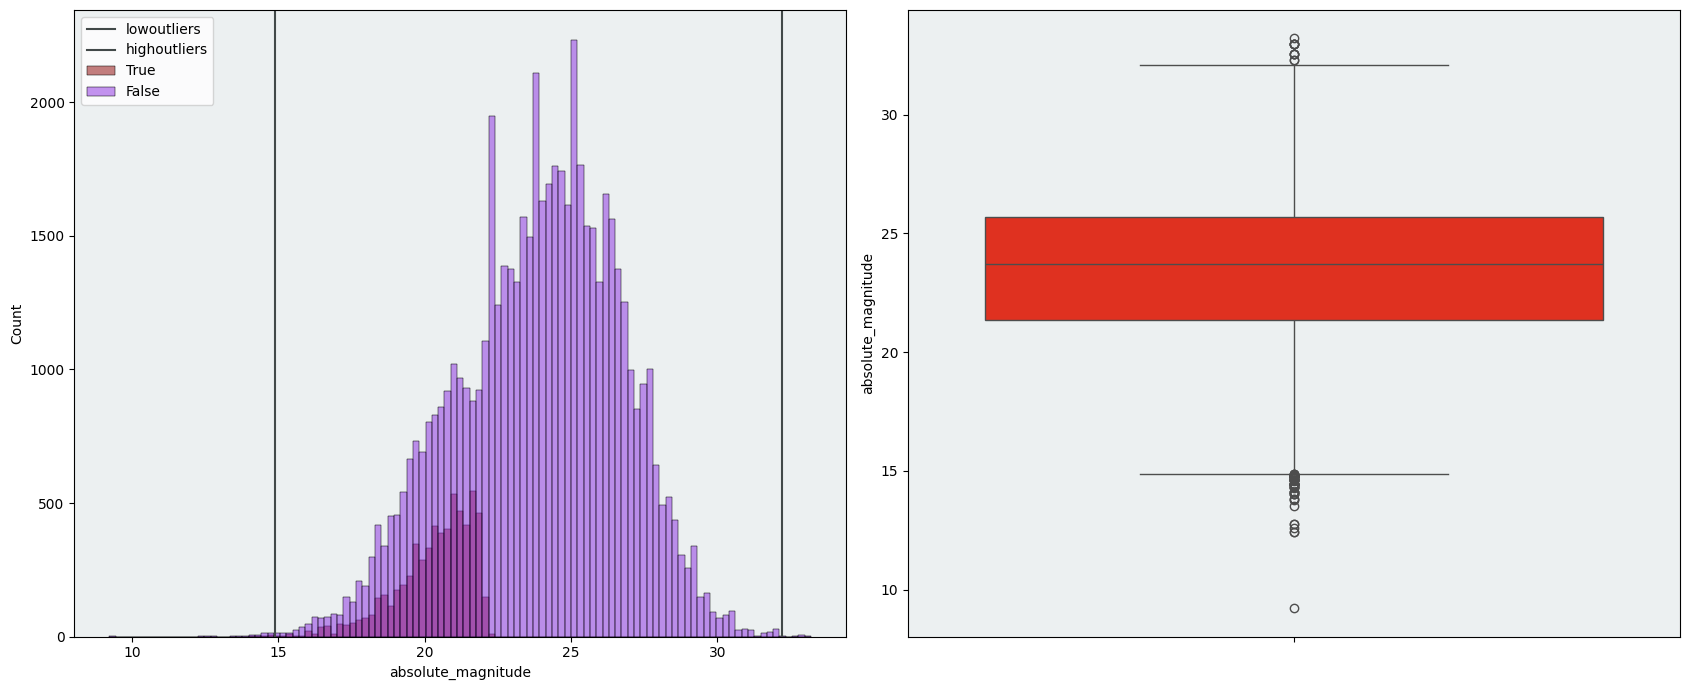

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
sns.histplot(data_analyses, x='absolute_magnitude', hue='hazardous', palette=['#8A2BE2', '#8B0000'], ax=ax1)
plt.gca().set_facecolor('#f0f0f0')

ax1.axvline(x=lowoutliers, color='#424949')
ax1.axvline(x=highoutliers, color='#424949')

sns.boxplot(data_analyses.absolute_magnitude, palette=['#FF1700'], ax=ax2)
ax1.legend(['lowoutliers', 'highoutliers', 'True', 'False'])

ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')

plt.tight_layout()
plt.show()

In [ ]:
data_noise = data_noise[data_noise['absolute_magnitude'] <= lowoutliers]
data_noise = data_noise[data_noise['absolute_magnitude'] >= highoutliers]

<ipython-input-21-cc0c64410474>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.miss_distance, palette=['#FF1700'], ax=ax2)


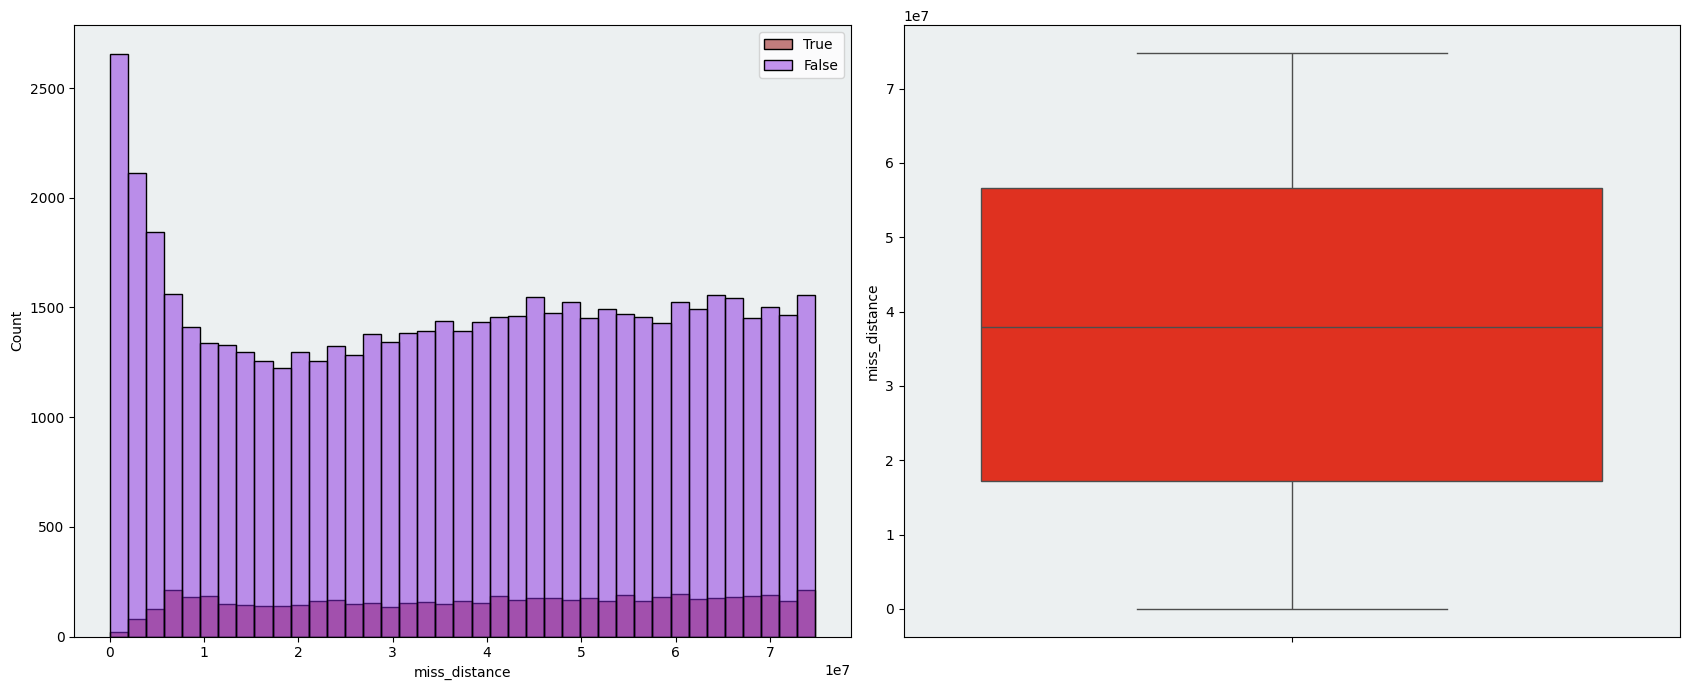

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

sns.histplot(data_analyses, x='miss_distance', hue='hazardous', palette=['#8A2BE2', '#8B0000'], ax=ax1)

sns.boxplot(data_analyses.miss_distance, palette=['#FF1700'], ax=ax2)
ax1.legend(['True', 'False'])

plt.gca().set_facecolor('#424949')
plt.tight_layout()

ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
lowoutliers2 = data_analyses.relative_velocity.quantile(0.75) + (data_analyses.relative_velocity.quantile(0.75) - data_analyses.relative_velocity.quantile(0.25)) * 1.5

<ipython-input-23-fab56987b9c4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.relative_velocity, palette=['#FF1700'], ax=ax2)


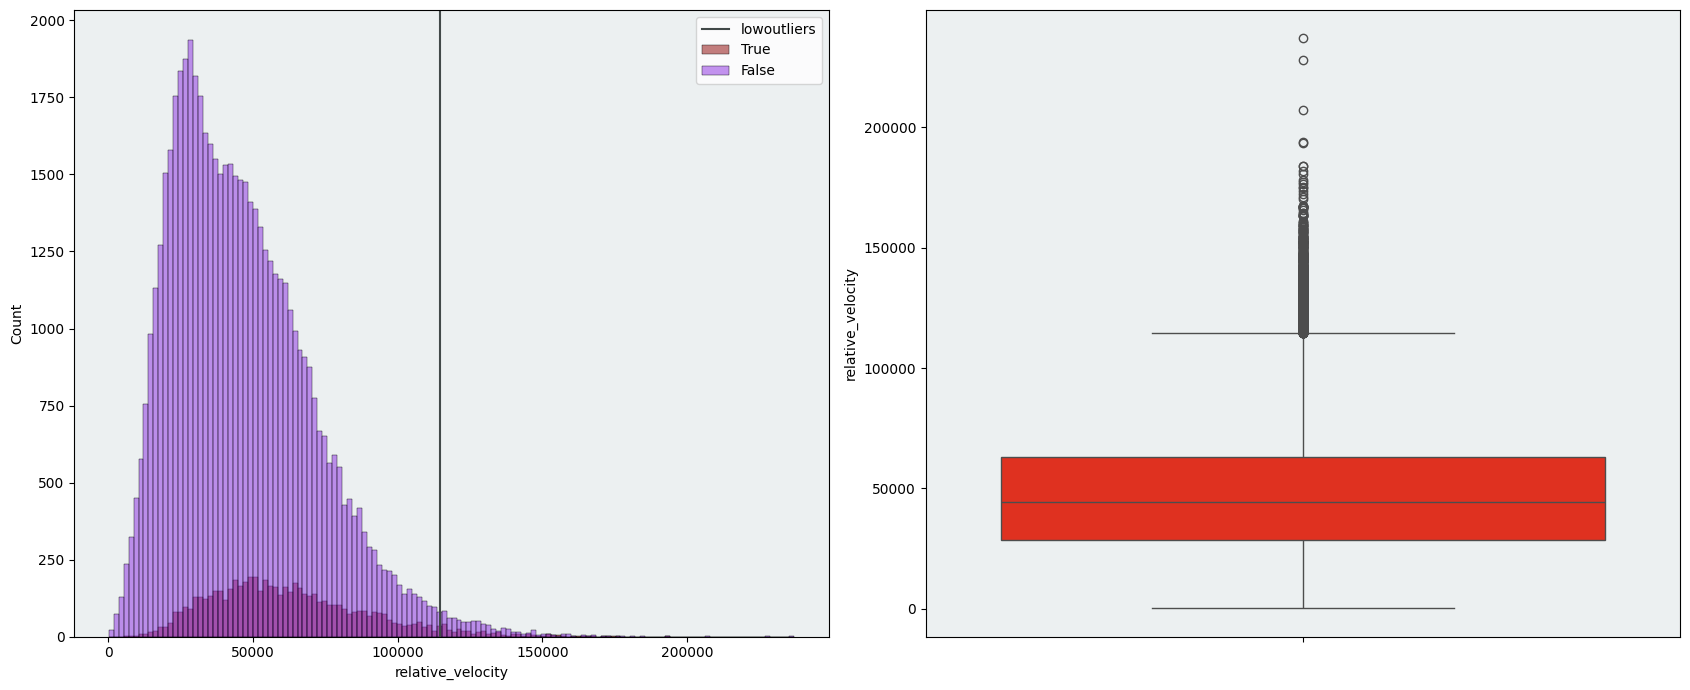

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

sns.histplot(data_analyses, x='relative_velocity', palette=['#8A2BE2', '#8B0000'], hue='hazardous', ax=ax1)
ax1.axvline(x=lowoutliers2, color='#424949')

sns.boxplot(data_analyses.relative_velocity, palette=['#FF1700'], ax=ax2)

ax1.legend(['lowoutliers', 'True', 'False'])
plt.gca().set_facecolor('#424949')
plt.tight_layout()

ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')

plt.show()

In [ ]:
data_noise = data_noise[data_noise['relative_velocity'] <= lowoutliers2]

In [ ]:
lowoutliers3 = data_analyses.est_diameter_max.quantile(0.75) + (data_analyses.est_diameter_max.quantile(0.75) - data_analyses.est_diameter_max.quantile(0.25)) * 1.5

<ipython-input-26-54daa39cfa1c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.est_diameter_max, palette=['#FF1700'], ax=ax2)


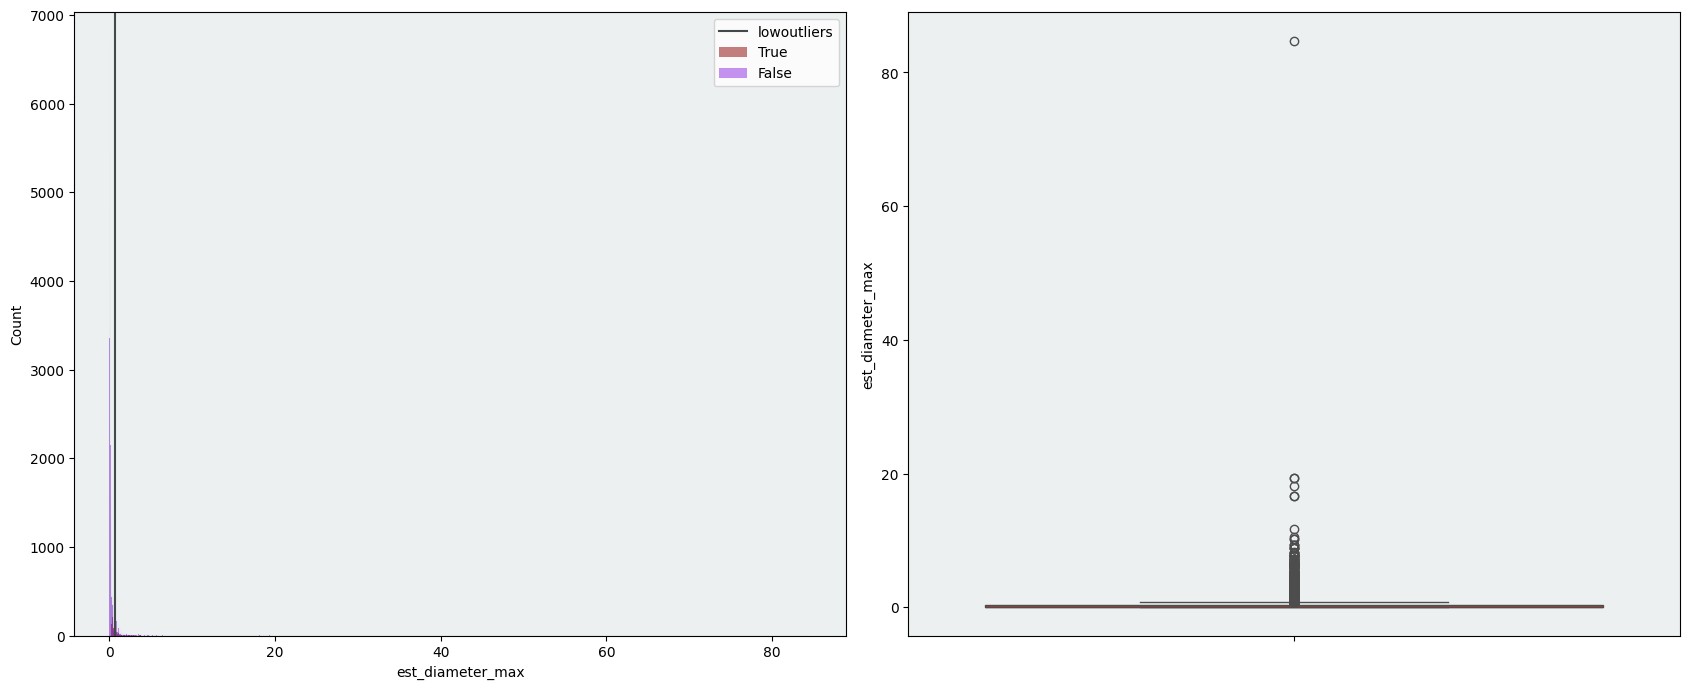

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

sns.histplot(data_analyses, x='est_diameter_max', hue='hazardous', palette=['#8A2BE2', '#8B0000'], ax=ax1)
ax1.axvline(x=lowoutliers3, color='#424949')

sns.boxplot(data_analyses.est_diameter_max, palette=['#FF1700'], ax=ax2)
ax1.legend(['lowoutliers', 'True', 'False'])

plt.gca().set_facecolor('#424949')
plt.tight_layout()

ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')

plt.show()

In [ ]:
data_noise = data_noise[data_noise['est_diameter_max'] <= lowoutliers3]

 **Pairplot for deleted data**  ⏳

---




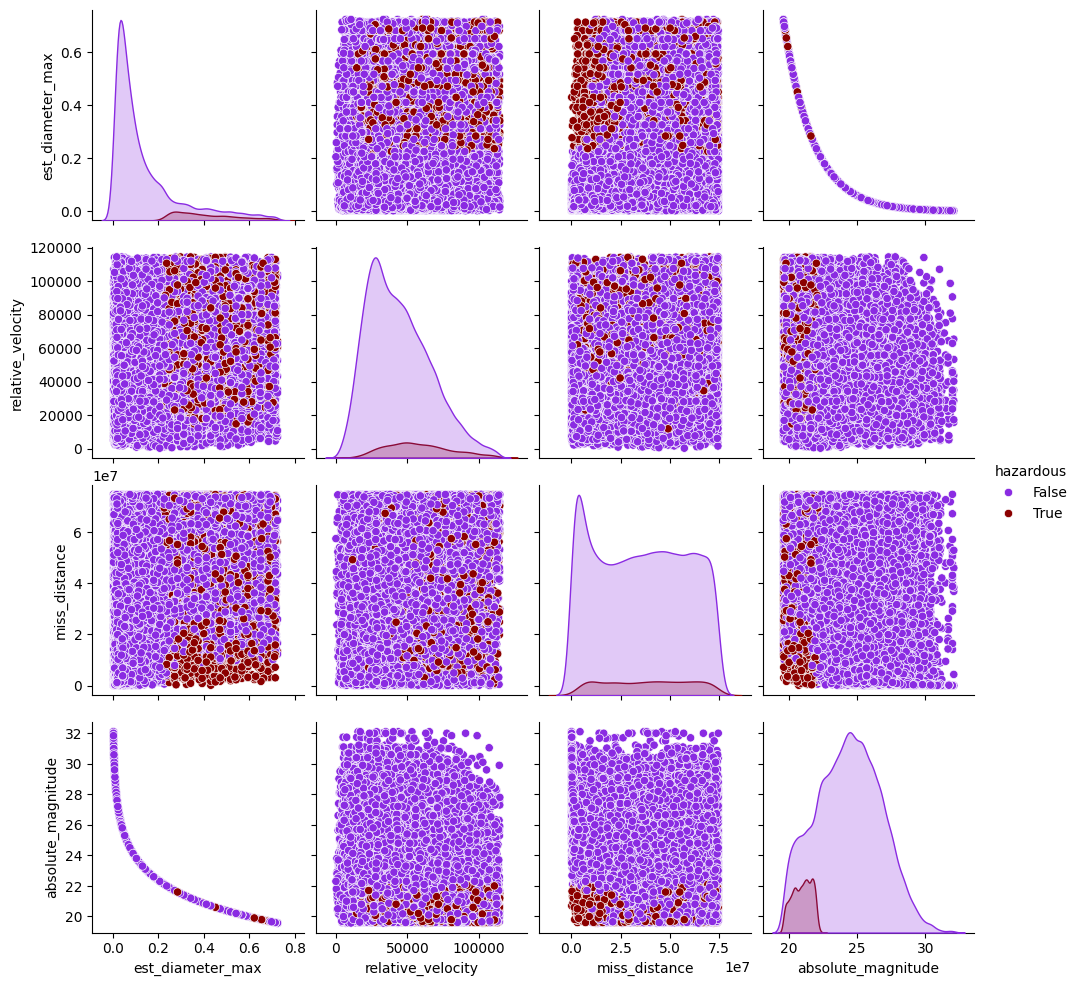

In [ ]:
sns.pairplot(data_noise , hue = 'hazardous', palette= ['#8A2BE2',  '#8B0000'])

# **Balance target**

In [ ]:
print(data_noise.hazardous.value_counts())

hazardous
False    52989
True      4596
Name: count, dtype: int64


In [ ]:
# 1 --> 0
# smote = SMOTE()
# data_balance, target_balance = smote.fit_resample(data_analyses,data_analyses['hazardous'])
# data_balance['hazardous'] = target_balance
# data_analyses = data_balance

In [ ]:
# # 1 --> 0
df_minority_upsampled = resample(data_noise[data_noise.hazardous == 1], replace=True,
                                 n_samples=len(data_noise[data_noise.hazardous == 0]), random_state=42)
data_resample = pd.concat([data_noise[data_noise.hazardous == 0], df_minority_upsampled])

In [ ]:
# # 1 --> 0
df_minority_upsampled2 = resample(data_analyses[data_analyses.hazardous == 1], replace=True,
                                 n_samples=len(data_analyses[data_analyses.hazardous == 0]), random_state=42)
data_resample2 = pd.concat([data_analyses[data_analyses.hazardous == 0], df_minority_upsampled2])

In [ ]:
# 0 --> 1
# df_majority_upsampled = resample(data_analyses[data_analyses.hazardous== 0], replace= False, n_samples= len(data_analyses[data_analyses.hazardous== 1]), random_state= 42)
# data_analyses = pd.concat([df_majority_upsampled, data_analyses[data_analyses.hazardous== 1]], axis=0)

In [ ]:
# 0 --> 1
# 1 --> 0
# df_majority_upsampled = resample(data_analyses[data_analyses.hazardous== 0], replace= False, n_samples= int(len(data_analyses[data_analyses.hazardous== 1])* 0.5), random_state= 42)

# df_minority_upsampled = resample(data_analyses[data_analyses.hazardous== 1], replace= True, n_samples= int(len(df_majority_upsampled)), random_state= 42)

# data_analyses = pd.concat([df_majority_upsampled, df_minority_upsampled], axis=0)

# data_analyses = data_analyses.sample(frac= 1, random_state= 42).reset_index(drop= True)

In [ ]:
print(data_resample.hazardous.value_counts())
print(data_resample2.hazardous.value_counts())

hazardous
False    52989
True     52989
Name: count, dtype: int64
hazardous
False    57810
True     57810
Name: count, dtype: int64


<ipython-input-33-63f6c7939074>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hazardous', palette=['#8A2BE2', '#8B0000'], data=data_resample)


<Axes: xlabel='hazardous', ylabel='count'>

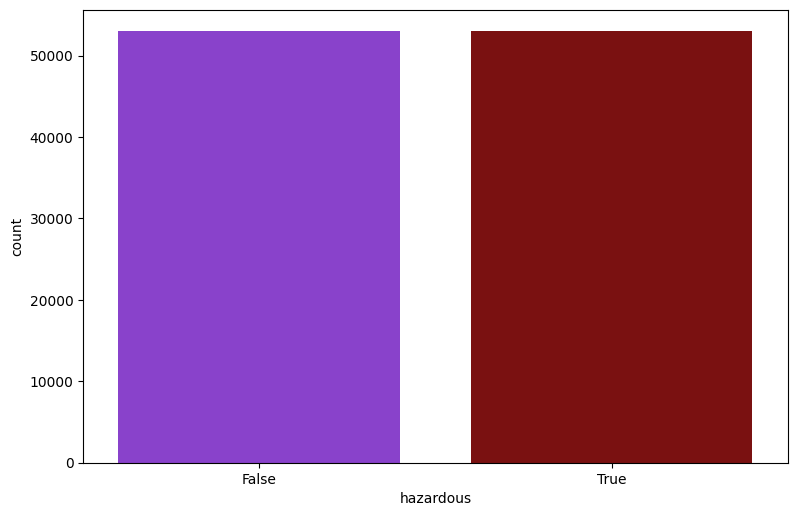

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 3)
sns.countplot(x='hazardous', palette=['#8A2BE2', '#8B0000'], data=data_resample)

 **Pairplot for resample data**  ⏳

---




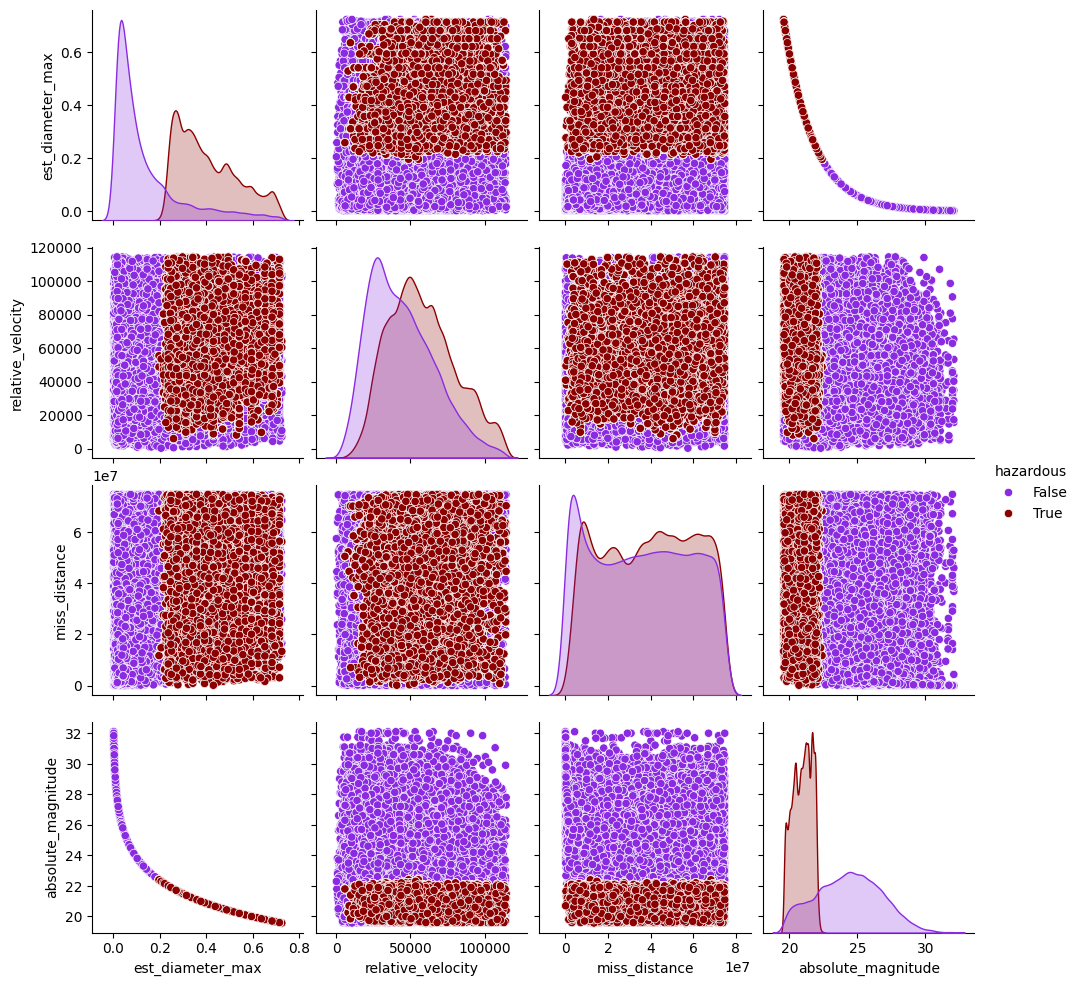

In [ ]:
sns.pairplot(data_resample , hue = 'hazardous', palette= ['#8A2BE2',  '#8B0000'])

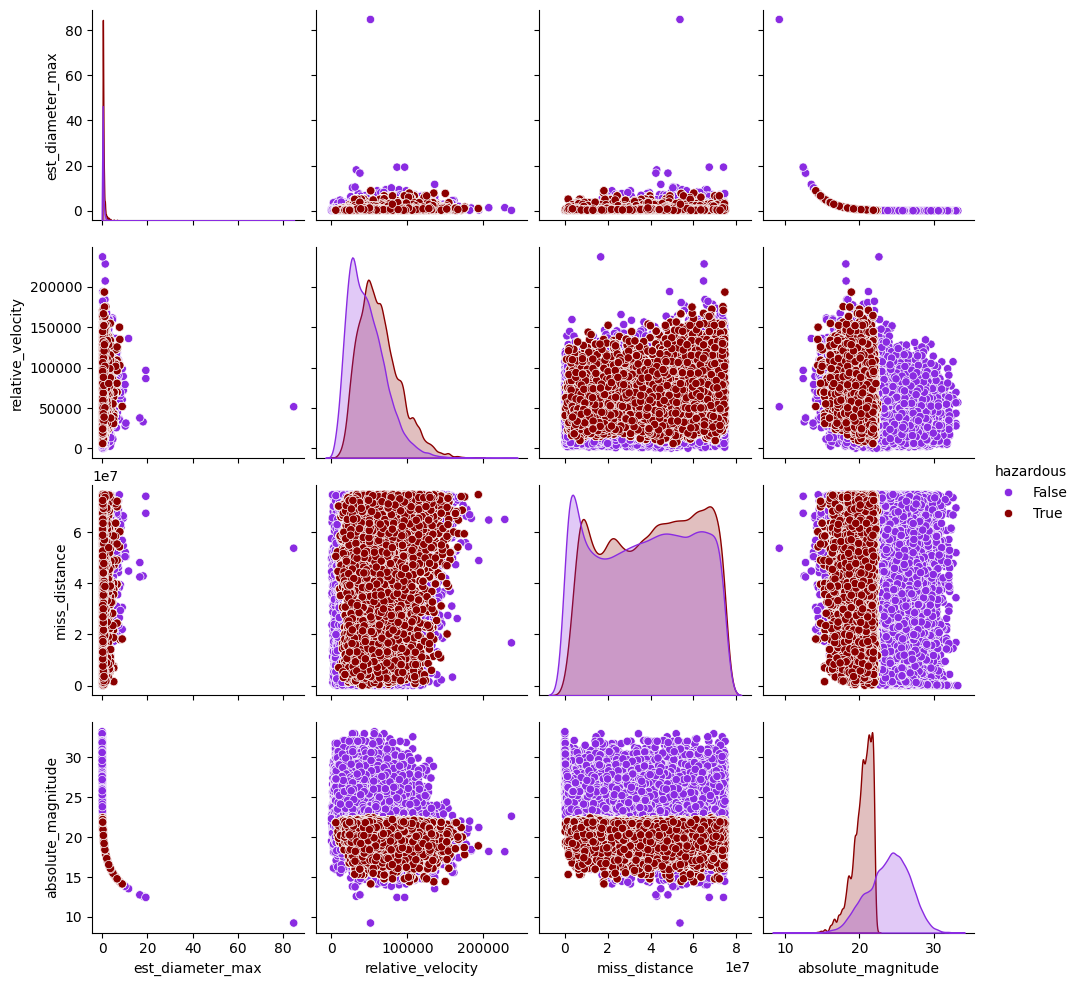

In [ ]:
sns.pairplot(data_resample2 , hue = 'hazardous', palette= ['#8A2BE2',  '#8B0000'])

# **Encoder**

In [ ]:
test_data['hazardous'] = pd.Categorical(test_data['hazardous']).codes
val_data['hazardous'] = pd.Categorical(val_data['hazardous']).codes

data_analyses['hazardous'] = pd.Categorical(data_analyses['hazardous']).codes
data_noise['hazardous'] = pd.Categorical(data_noise['hazardous']).codes
data_resample['hazardous'] = pd.Categorical(data_resample['hazardous']).codes
data_resample2['hazardous'] = pd.Categorical(data_resample2['hazardous']).codes


# **Correlation of features**

In [ ]:
vifd = pd.DataFrame()

vifd['Feature'] = data_analyses.columns

vifd['VIF resample'] = [variance_inflation_factor(data_resample.values, i) for i in range(data_resample.shape[1])]

vifd['VIF resample2'] = [variance_inflation_factor(data_resample2.values, i) for i in range(data_resample2.shape[1])]

display(vifd)

Feature  VIF resample  VIF resample2
0    est_diameter_max      5.645832       1.706101
1   relative_velocity      6.817375       6.012248
2       miss_distance      4.238856       4.355257
3  absolute_magnitude      5.796985       5.107956
4           hazardous      3.879358       2.295088

In [ ]:
# x_test, y_test = [test_data[['est_diameter_max', 'absolute_magnitude',  'miss_distance',  'relative_velocity']], test_data['hazardous']]
# x_train, y_train = [data_noise_2[['est_diameter_max',  'absolute_magnitude',  'miss_distance',  'relative_velocity']], data_noise_2['hazardous']]
# x_val, y_val = [val_data[['est_diameter_max',  'absolute_magnitude',  'miss_distance',  'relative_velocity']], val_data['hazardous']]

# x_train =  pd.DataFrame(x_train)
# x_test = pd.DataFrame(x_test)
# x_val = pd.DataFrame(x_val)

# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# x_val = scaler.transform(x_val)

# for j in range(1,15):
#       model =  KNeighborsClassifier(n_neighbors=j, p=2)
#       model.fit(x_train, y_train)
#       y_pred = model.predict(x_val)
#       print(f'{j}  :  {accuracy_score(y_val, y_pred)}')
#       print(f1_score(y_val, y_pred))

1  :  0.9003504494895627
0.17110266159695817
2  :  0.9037787597135456
0.08544532947139753
3  :  0.90423586774341
0.11665495432185524
4  :  0.9050738991314947
0.09315866084425037
5  :  0.9047691604449185
0.11221590909090909
6  :  0.905378637818071
0.10903873744619799
7  :  0.9049977144598507
0.11622962437987243
8  :  0.9051500838031388
0.11387900355871886
9  :  0.9055310071613591
0.13649025069637882
10  :  0.9055310071613591
0.12921348314606743
11  :  0.9055310071613591
0.14246196403872752
12  :  0.9055310071613591
0.13649025069637882
13  :  0.9055310071613591
0.14835164835164835
14  :  0.9052262684747828
0.13850415512465375


In [ ]:
# from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [ ]:
# x_test, y_test = [test_data[['absolute_magnitude',  'miss_distance',  'relative_velocity']], test_data['hazardous']]
# x_train, y_train = [data_noise_2[['est_diameter_max',  'absolute_magnitude',  'miss_distance',  'relative_velocity']], data_noise_2['hazardous']]
# x_val, y_val = [val_data[['est_diameter_max',  'absolute_magnitude',  'miss_distance',  'relative_velocity']], val_data['hazardous']]

In [ ]:
# x_train =  pd.DataFrame(x_train)
# x_test = pd.DataFrame(x_test)
# x_val = pd.DataFrame(x_val)

In [ ]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# x_val = scaler.transform(x_val)

In [ ]:
# model = KNeighborsClassifier(n_neighbors=4, p=2)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

0.8596678348316319
0.2888030888030888
0.8587259650667841
0.28412049088880625


In [ ]:
# model = KNeighborsClassifier(n_neighbors=4, p=2)
# param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11]}
# cv = KFold(n_splits=3, shuffle=True, random_state=42)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)
# scores = cross_val_score(model, x_train, y_train, cv=cv)
# print(f'{scores.mean()}')
# print(f'{scores.std()}')
# print(f'{scores}')
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

0.9457097633332386
0.0015162500881133083
[0.94745372 0.94375729 0.94591828]
0.8675910406826146
0.45448838669177655


In [ ]:
# model = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

0.785083041292092
0.4722170252572498
0.7835021282841627
0.46246355685131196


In [ ]:
# model = LogisticRegression(solver="liblinear", max_iter=2)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

0.7740362639037026
0.4555800293685756
0.7720534272713929
0.4425699928212491


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# model = SVC(kernel="rbf", gamma=0.005, C=1.0)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

In [ ]:
# model = SVC(kernel="linear", gamma=1, C=1.0)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

In [ ]:
# model = RandomForestClassifier(n_estimators=3, random_state=42, n_jobs=-1)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

0.8909035502056987
0.4525993883792049
0.8905768383971818
0.4483906770255272


In [ ]:
# model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=3, random_state=42)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

0.7864543653816852
0.4537127265640226
0.7902539263173345
0.4527001148985063


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


#**Learning**

---



In [ ]:
x_test, y_test = [test_data[['absolute_magnitude']], test_data['hazardous']]
x_val, y_val = [val_data[['absolute_magnitude']], val_data['hazardous']]

x_train, y_train = [data_analyses[['absolute_magnitude']], data_analyses['hazardous']]
x_train0, y_train0 = [data_noise[['absolute_magnitude']], data_noise['hazardous']]
x_train1, y_train1 = [data_resample[['absolute_magnitude']], data_resample['hazardous']]
x_train2, y_train2 = [data_resample2[['absolute_magnitude']], data_resample2['hazardous']]

In [ ]:
scaler = StandardScaler()

x_test = scaler.fit_transform(x_test)
x_val = scaler.fit_transform(x_val)

x_train = scaler.fit_transform(x_train)
x_train0 = scaler.fit_transform(x_train0)
x_train1 = scaler.fit_transform(x_train1)
x_train2 = scaler.fit_transform(x_train2)

In [ ]:
x_test = pd.DataFrame(x_test, columns=['absolute_magnitude'])
x_val = pd.DataFrame(x_val, columns=['absolute_magnitude'])
x_train = pd.DataFrame(x_train, columns=['absolute_magnitude'])
x_train0 = pd.DataFrame(x_train0, columns=['absolute_magnitude'])
x_train1 = pd.DataFrame(x_train1, columns=['absolute_magnitude'])
x_train2 = pd.DataFrame(x_train2, columns=['absolute_magnitude'])


## Evaluating All Feature Combinations with Random Forest for Model Performance **Analysis**

In [ ]:
features = ['absolute_magnitude', 'relative_velocity', 'miss_distance', 'est_diameter_max']

for r in range(1, len(features) + 1):
    for combo in combinations(features, r):

        x_subset_train = x_train2[list(combo)]
        x_subset_test = x_test[list(combo)]

        class_weights = {0: 1, 1:9}
        rf = RandomForestClassifier(n_estimators=100, random_state=42,  class_weight=class_weights)

        rf.fit(x_subset_train, y_train2)

        y_pred = rf.predict(x_subset_test)

        acc = rf.score(x_subset_test, y_test)
        f1 = f1_score(y_test, y_pred)

        print(f"Combination: {combo}, Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

Combination: ('absolute_magnitude',), Accuracy: 0.6730, F1 Score: 0.3130
Combination: ('relative_velocity',), Accuracy: 0.8244, F1 Score: 0.1270
Combination: ('miss_distance',), Accuracy: 0.8267, F1 Score: 0.0951
Combination: ('est_diameter_max',), Accuracy: 0.3118, F1 Score: 0.1814
Combination: ('absolute_magnitude', 'relative_velocity'), Accuracy: 0.7994, F1 Score: 0.2294
Combination: ('absolute_magnitude', 'miss_distance'), Accuracy: 0.8108, F1 Score: 0.2622
Combination: ('absolute_magnitude', 'est_diameter_max'), Accuracy: 0.6363, F1 Score: 0.3250
Combination: ('relative_velocity', 'miss_distance'), Accuracy: 0.8567, F1 Score: 0.1408
Combination: ('relative_velocity', 'est_diameter_max'), Accuracy: 0.6376, F1 Score: 0.1322
Combination: ('miss_distance', 'est_diameter_max'), Accuracy: 0.6095, F1 Score: 0.1441
Combination: ('absolute_magnitude', 'relative_velocity', 'miss_distance'), Accuracy: 0.8398, F1 Score: 0.2375
Combination: ('absolute_magnitude', 'relative_velocity', 'est_diam

# **Grid search**

**KNN**

In [ ]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [i for i in range(1, 10)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search_knn.fit(x_train0, y_train0)

print("Best parameters for KNN:", grid_search_knn.best_params_)

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


**Logistic Regression**

In [ ]:
logistic = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

grid_search_lr = GridSearchCV(logistic, param_grid, cv=5, scoring='f1')
grid_search_lr.fit(x_train0, y_train0)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


SVM

In [ ]:
svm = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='f1')
grid_search_svm.fit(x_train, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)

**Decision Tree**

In [ ]:
decision_tree = DecisionTreeClassifier()

param_grid = {
    'max_depth': [i for i in range(1,20)],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search_dt = GridSearchCV(decision_tree, param_grid, cv=5, scoring='f1')
grid_search_dt.fit(x_train0, y_train0)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

Best parameters for Decision Tree: {'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 10}


**Random Forest**

In [ ]:
random_forest = RandomForestClassifier()

param_grid = {
    'n_estimators': [5, 10, 50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring='f1')
grid_search_rf.fit(x_train0, y_train0)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 10}


**MLP (Neural Network)**

In [ ]:
mlp = MLPClassifier(max_iter=100)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search_mlp = GridSearchCV(mlp, param_grid, cv=5, scoring='f1')
grid_search_mlp.fit(x_train, y_train)

print("Best parameters for MLP:", grid_search_mlp.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


## **Function for training machine learning models**

In [ ]:
def train_and_evaluate(name, model, x_train, y_train, x_test, y_test):

    start_time = time.time()
    model.fit(x_train, y_train)
    train_time = time.time() - start_time


    start_time = time.time()
    y_pred = model.predict(x_test)
    pred_time = time.time() - start_time


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)


    return {
        "Model": name,
        "Accuracy": round(accuracy, 3),
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1": round(f1, 3),
        "Training Time (s)": round(train_time, 3),
        "Prediction Time (s)": round(pred_time, 3),
        "Confusion Matrix": cm,
        "Fitted Model": model
    }

In [ ]:
### analyses
models = {
    "KNN": KNeighborsClassifier(metric= 'euclidean',  n_neighbors= 1, weights= 'uniform', p=1),
    "Decision Tree": DecisionTreeClassifier(max_depth= 19, min_samples_leaf= 1, min_samples_split= 10),
    "Logistic Regression": LogisticRegression(C= 1, max_iter= 100, penalty= 'l2', solver= 'liblinear'),
    "SVM RBF": SVC(kernel="rbf", gamma=2, C=1.0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=3, random_state=42),
    "Random Forest": RandomForestClassifier(max_depth= None, min_samples_split= 5, n_estimators= 10)
}

### weight
models = {
    "KNN": KNeighborsClassifier(n_neighbors=4, p=2),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=14, random_state=42),
    "Logistic Regression": LogisticRegression(solver="liblinear", max_iter=6),
    "SVM RBF": SVC(kernel="rbf", gamma=2, C=1.0),
    "SVM Linear": SVC(kernel="linear", gamma=2, C=1.0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=4, random_state=42, n_jobs=-1)
}

### noise_weight
models = {
    "KNN": KNeighborsClassifier(n_neighbors=4, p=2),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=14, random_state=42),
    "Logistic Regression": LogisticRegression(solver="liblinear", max_iter=6),
    "SVM RBF": SVC(kernel="rbf", gamma=2, C=1.0),
    "SVM Linear": SVC(kernel="linear", gamma=2, C=1.0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=4, random_state=42, n_jobs=-1)
}

### resample
models1 = {
    "KNN": KNeighborsClassifier(n_neighbors=4, p=2),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42),
    "Logistic Regression": LogisticRegression(solver="liblinear", max_iter=2),
    "SVM RBF": SVC(kernel="rbf", gamma=2, C=1.0),
    "SVM Linear": SVC(kernel="linear", gamma=2, C=1.0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=3, random_state=42, n_jobs=-1)
}

### resample2
models2 = {
    "KNN": KNeighborsClassifier(n_neighbors=2, p=2),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42),
    "Logistic Regression": LogisticRegression(solver="liblinear", max_iter=4),
    "SVM RBF": SVC(kernel="rbf", gamma=2, C=1.0),
    "SVM Linear": SVC(kernel="linear", gamma=2, C=1.0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=4, random_state=42, n_jobs=-1)
}

In [ ]:
results = []
results1 = []
results2 = []

for name, model in tqdm(models.items(), desc="Training models"):

    result = train_and_evaluate(name, model, x_train, y_train, x_test, y_test)
    results.append(result)


for name, model in tqdm(models1.items(), desc="Training models1"):

    result1 = train_and_evaluate(name, model, x_train1, y_train1, x_test, y_test)
    results1.append(result1)


for name, model in tqdm(models2.items(), desc="Training models2"):

    result2 = train_and_evaluate(name, model, x_train2, y_train2, x_test, y_test)
    results2.append(result2)

Training models:  29%|██▊       | 2/7 [00:00<00:02,  2.41it/s]/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Training models:  57%|█████▋    | 4/7 [01:41<01:34, 31.54s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Training models:  71%|███████▏  | 5/7 [02:00<00:55, 27.73s/it]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
Training models0:  29%|██▊       | 2/7 [00:00<00:01,  2.68it/s]/usr/local/lib/python3.10/dist-packages/sklear

**Confusion Matrix**

---



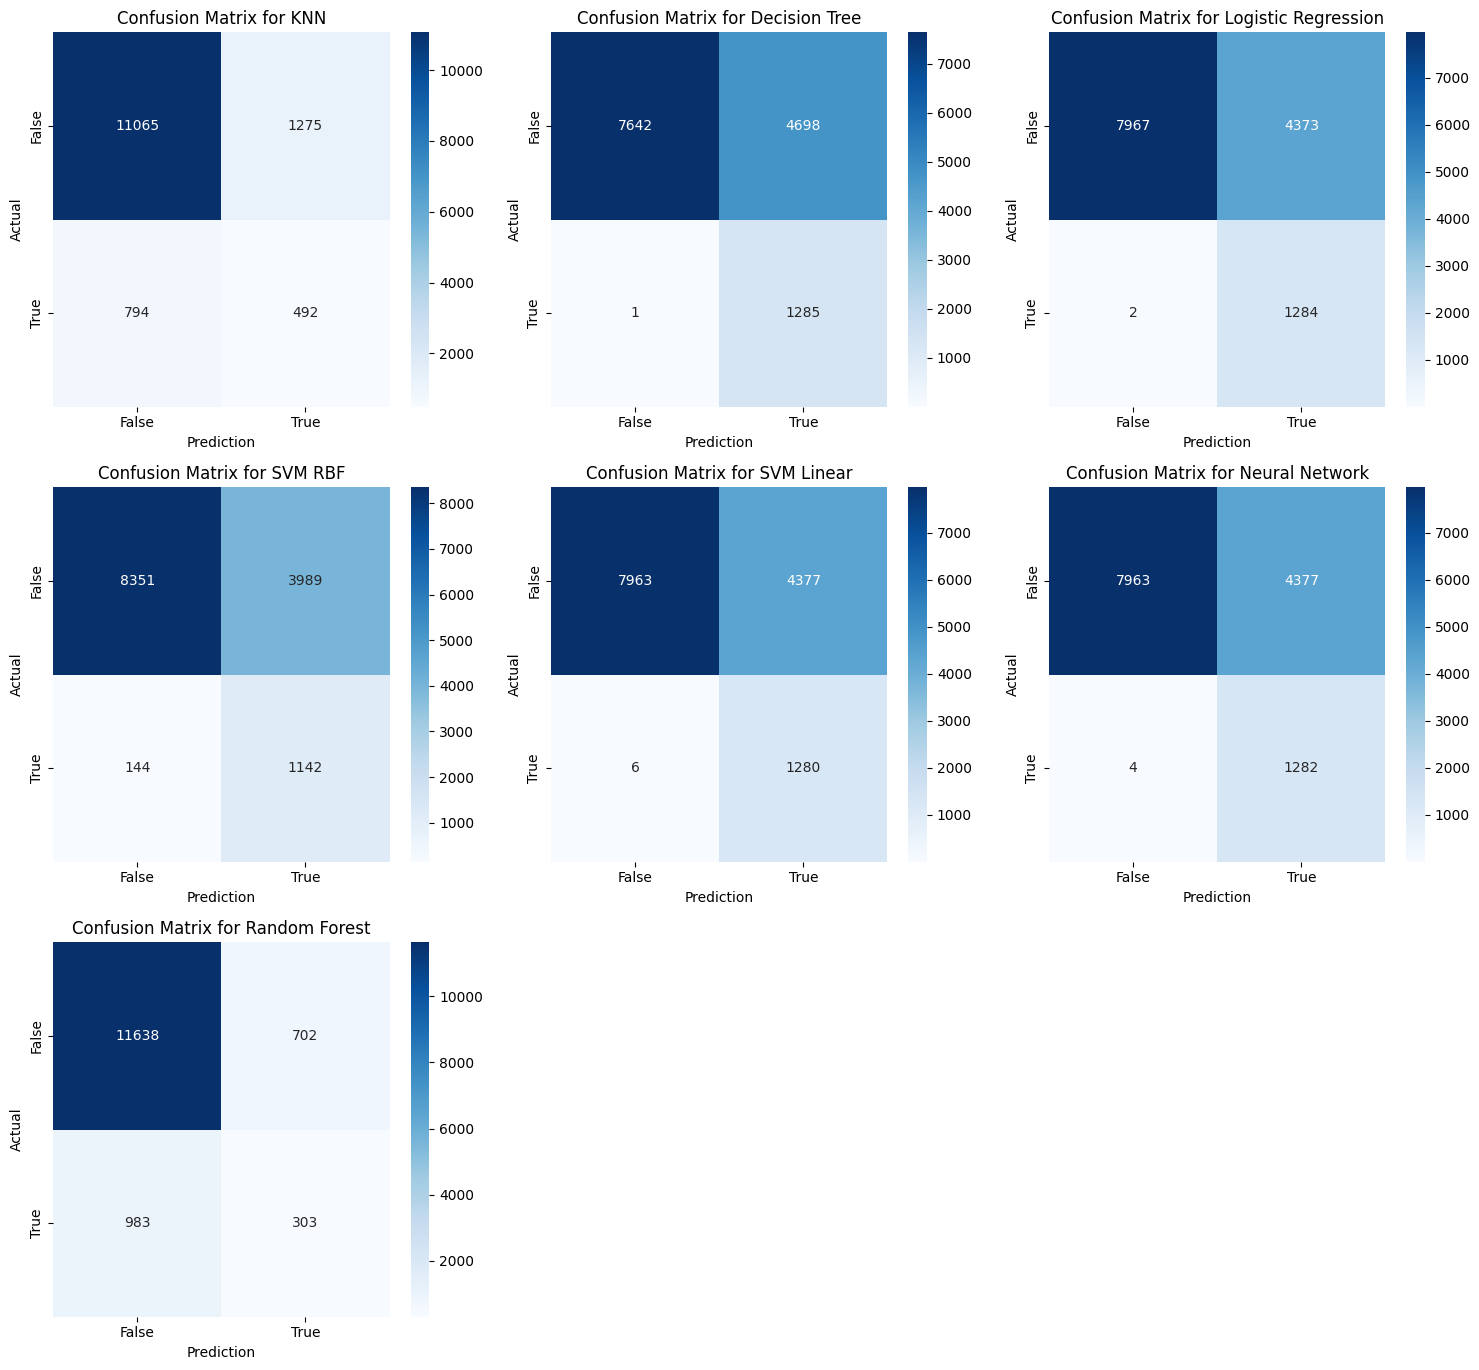

In [ ]:
if all(isinstance(result, dict) for result in results2):
    confusion_matrices = {result["Model"]: result["Confusion Matrix"] for result in results2}
else:
    print("Error: elements in results2 are not dictionaries.")

num_models = len(confusion_matrices)
num_cols = 3
num_rows = (num_models + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['False', 'True'], yticklabels=['False', 'True'])
    axes[i].set_title(f'Confusion Matrix for {name}')
    axes[i].set_xlabel('Prediction')
    axes[i].set_ylabel('Actual')

for j in range(len(confusion_matrices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

**Score**

---



In [ ]:
result_df = pd.DataFrame(results)
result_df1 = pd.DataFrame(results1)
result_df2 = pd.DataFrame(results2)

print("\nResults for Model (data analyses):\n")
display(result_df)

print("\n\n\nResults for Model (data resample):\n")
display(result_df1)

print("\n\n\nResults for Model (data noise2):\n")
display(result_df2)


Results for Model (data analyses):



Model  Accuracy  Precision  Recall     F1  Training Time (s)  \
0                  KNN     0.909      0.545   0.209  0.302              0.060   
1        Decision Tree     0.911      0.571   0.222  0.320              0.199   
2  Logistic Regression     0.905      0.480   0.082  0.141              0.063   
3              SVM RBF     0.913      0.730   0.131  0.222             92.206   
4           SVM Linear     0.906      0.000   0.000  0.000             16.730   
5       Neural Network     0.913      0.724   0.124  0.212              0.860   
6        Random Forest     0.913      0.569   0.323  0.412              0.353   

   Prediction Time (s)             Confusion Matrix  \
0                0.614  [[12115, 225], [1017, 269]]   
1                0.001  [[12125, 215], [1000, 286]]   
2                0.001  [[12225, 115], [1180, 106]]   
3                7.793   [[12278, 62], [1118, 168]]   
4                2.470      [[12340, 0], [1286, 0]]   
5                0.007   [[12279, 61], [1126, 160]]   
6                0.013   [[12026, 314], [871, 415]]   

                                        Fitted Model  
0                KNeighborsClassifier(n_neighbors=4)  
1  DecisionTreeClassifier(max_depth=14, random_st...  
2  LogisticRegression(max_iter=6, solver='libline...  
3                                       SVC(gamma=2)  
4                      SVC(gamma=2, kernel='linear')  
5         MLPClassifier(max_iter=3, random_state=42)  
6  (DecisionTreeClassifier(max_features='sqrt', r...




Results for Model (data noise):



Model  Accuracy  Precision  Recall     F1  Training Time (s)  \
0                  KNN     0.887      0.336   0.197  0.248              0.042   
1        Decision Tree     0.905      0.479   0.080  0.137              0.126   
2  Logistic Regression     0.894      0.273   0.072  0.113              0.028   
3              SVM RBF     0.908      0.642   0.061  0.112             58.561   
4           SVM Linear     0.906      0.000   0.000  0.000             11.042   
5       Neural Network     0.906      0.536   0.058  0.105              0.770   
6        Random Forest     0.901      0.408   0.114  0.178              0.170   

   Prediction Time (s)             Confusion Matrix  \
0                0.638  [[11840, 500], [1033, 253]]   
1                0.001  [[12228, 112], [1183, 103]]   
2                0.001   [[12095, 245], [1194, 92]]   
3                6.958    [[12296, 44], [1207, 79]]   
4                1.796      [[12340, 0], [1286, 0]]   
5                0.008    [[12275, 65], [1211, 75]]   
6                0.013  [[12128, 212], [1140, 146]]   

                                        Fitted Model  
0                KNeighborsClassifier(n_neighbors=1)  
1  DecisionTreeClassifier(max_depth=8, random_sta...  
2  LogisticRegression(max_iter=3, solver='libline...  
3                                       SVC(gamma=2)  
4                      SVC(gamma=2, kernel='linear')  
5         MLPClassifier(max_iter=3, random_state=42)  
6  (DecisionTreeClassifier(max_features='sqrt', r...




Results for Model (data resample):



Model  Accuracy  Precision  Recall     F1  Training Time (s)  \
0                  KNN     0.801      0.250   0.551  0.344              0.083   
1        Decision Tree     0.674      0.225   0.999  0.367              0.080   
2  Logistic Regression     0.697      0.237   0.996  0.383              0.037   
3              SVM RBF     0.706      0.225   0.863  0.356            306.120   
4           SVM Linear     0.681      0.228   0.995  0.371            101.820   
5       Neural Network     0.684      0.230   0.996  0.373              1.487   
6        Random Forest     0.823      0.275   0.538  0.364              0.386   

   Prediction Time (s)             Confusion Matrix  \
0                0.827  [[10210, 2130], [577, 709]]   
1                0.001    [[7903, 4437], [1, 1285]]   
2                0.001    [[8222, 4118], [5, 1281]]   
3               13.978  [[8507, 3833], [176, 1110]]   
4                5.855    [[7997, 4343], [6, 1280]]   
5                0.007    [[8044, 4296], [5, 1281]]   
6                0.013  [[10516, 1824], [594, 692]]   

                                        Fitted Model  
0                KNeighborsClassifier(n_neighbors=4)  
1  DecisionTreeClassifier(max_depth=2, random_sta...  
2  LogisticRegression(max_iter=2, solver='libline...  
3                                       SVC(gamma=2)  
4                      SVC(gamma=2, kernel='linear')  
5         MLPClassifier(max_iter=3, random_state=42)  
6  (DecisionTreeClassifier(max_features='sqrt', r...




Results for Model (data noise2):



Model  Accuracy  Precision  Recall     F1  Training Time (s)  \
0                  KNN     0.848      0.278   0.383  0.322              0.080   
1        Decision Tree     0.655      0.215   0.999  0.354              0.145   
2  Logistic Regression     0.679      0.227   0.998  0.370              0.054   
3              SVM RBF     0.697      0.223   0.888  0.356            295.463   
4           SVM Linear     0.678      0.226   0.995  0.369            101.301   
5       Neural Network     0.678      0.227   0.997  0.369              2.675   
6        Random Forest     0.876      0.301   0.236  0.265              0.485   

   Prediction Time (s)             Confusion Matrix  \
0                0.756  [[11065, 1275], [794, 492]]   
1                0.001    [[7642, 4698], [1, 1285]]   
2                0.001    [[7967, 4373], [2, 1284]]   
3               14.711  [[8351, 3989], [144, 1142]]   
4                6.239    [[7963, 4377], [6, 1280]]   
5                0.008    [[7963, 4377], [4, 1282]]   
6                0.013   [[11638, 702], [983, 303]]   

                                        Fitted Model  
0                KNeighborsClassifier(n_neighbors=2)  
1  DecisionTreeClassifier(max_depth=4, random_sta...  
2  LogisticRegression(max_iter=4, solver='libline...  
3                                       SVC(gamma=2)  
4                      SVC(gamma=2, kernel='linear')  
5         MLPClassifier(max_iter=3, random_state=42)  
6  (DecisionTreeClassifier(max_features='sqrt', r...

**Tree🌳**

---



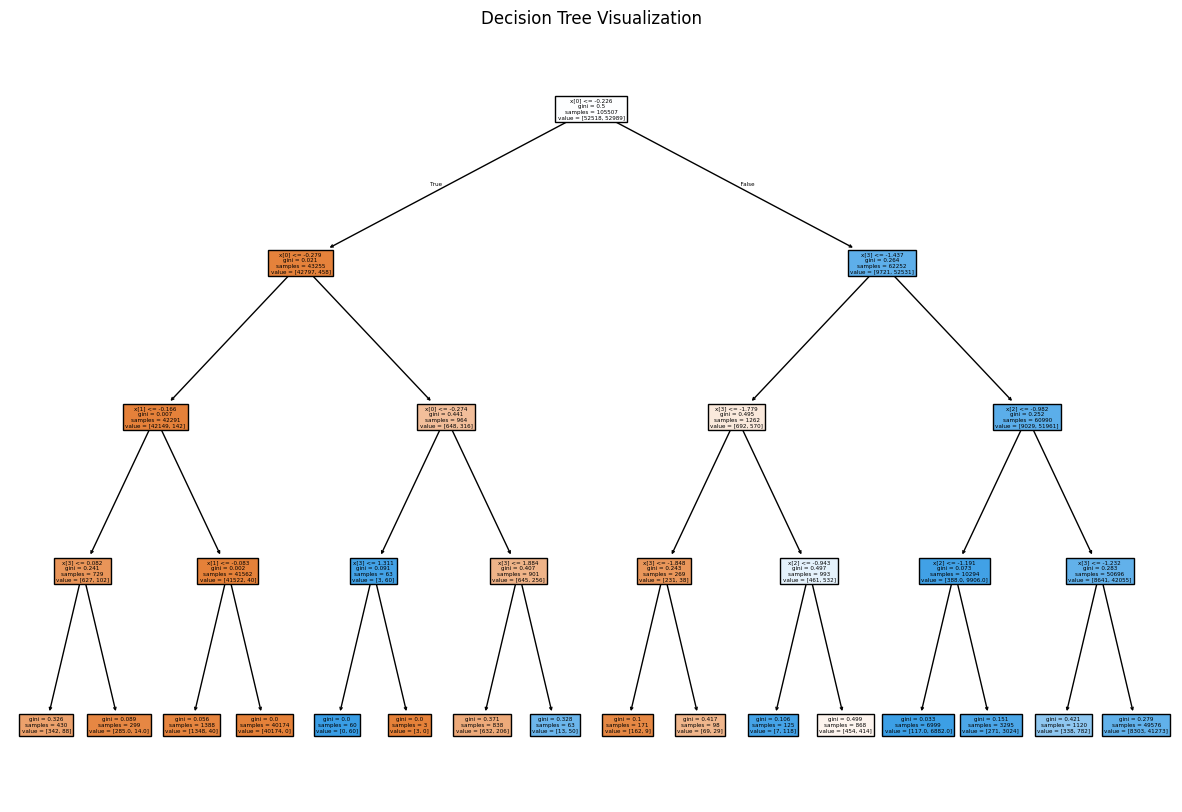

In [ ]:
dt_result = next(result for result in results2 if result["Model"] == "Decision Tree")
dt_model = dt_result["Fitted Model"]
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# **Boosting 🔥**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2, p=2)
knn.fit(x_train2, y_train2)

decision_tree=  DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
decision_tree.fit(x_train2, y_train2)

logistic_regression = LogisticRegression(solver="liblinear", max_iter=4)
logistic_regression.fit(x_train2, y_train2)

neural_network =  MLPClassifier(hidden_layer_sizes=(100,), max_iter=3, random_state=42)
neural_network.fit(x_train2, y_train2)

random_forest = RandomForestClassifier(n_estimators=4, random_state=42, n_jobs=-1)
random_forest.fit(x_train2, y_train2)

# svm_rbf = SVC(kernel="rbf",probability=True , gamma=2, C=1.0)
# svm_rbf.fit(x_train2, y_train2)

# svm_linear = SVC(kernel="linear",probability= True , gamma=2, C=1.0)
# svm_linear.fit(x_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomForestClassifier(n_estimators=4, n_jobs=-1, random_state=42)

In [ ]:
k_val_pred = knn.predict_proba(x_val)[:, 1]
dt_val_pred = decision_tree.predict_proba(x_val)[:, 1]
lr_val_pred = logistic_regression.predict_proba(x_val)[:, 1]
# sr_val_pred = svm_rbf.predict_proba(x_val)[:, 1]
# sl_val_pred = svm_linear.predict_proba(x_val)[:, 1]
nn_val_pred = neural_network.predict_proba(x_val)[:, 1]
rf_val_pred = random_forest.predict_proba(x_val)[:, 1]

meta_inputs_val = np.vstack([k_val_pred, dt_val_pred, lr_val_pred, nn_val_pred, rf_val_pred]).T

meta_inputs_val = np.hstack([meta_inputs_val, x_val])

k_test_pred = knn.predict_proba(x_test)[:, 1]
dt_test_pred = decision_tree.predict_proba(x_test)[:, 1]
lr_test_pred = logistic_regression.predict_proba(x_test)[:, 1]
# sr_test_pred = svm_rbf.predict_proba(x_test)[:, 1]
# sl_test_pred = svm_linear.predict_proba(x_test)[:, 1]
nn_test_pred = neural_network.predict_proba(x_test)[:, 1]
rf_test_pred = random_forest.predict_proba(x_test)[:, 1]

meta_inputs_test = np.vstack([k_test_pred, dt_test_pred, lr_test_pred, nn_test_pred, rf_test_pred]).T

meta_inputs_test = np.hstack([meta_inputs_test, x_test])

In [ ]:
meta_model = Sequential([
    Dense(16, activation='relu', input_shape=(meta_inputs_val.shape[1], )),

    Dense(8, activation='relu'),

    Dense(1, activation='sigmoid')
])

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

meta_model.fit(meta_inputs_val, y_val, epochs=10, batch_size=16, verbose=1)

meta_test_preds = meta_model.predict(meta_inputs_test)

print(f'score : {accuracy_score(meta_test_preds.round(), y_test)}')
print(f'f1 : {f1_score(meta_test_preds.round(), y_test)}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


821/821 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6944 - loss: 0.5319
Epoch 2/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9073 - loss: 0.2130
Epoch 3/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9084 - loss: 0.2095
Epoch 4/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9106 - loss: 0.1965
Epoch 5/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9092 - loss: 0.1936
Epoch 6/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9089 - loss: 0.1916
Epoch 7/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9103 - loss: 0.1888
Epoch 8/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9078 - loss: 0.1918
Epoch 9/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9102 - loss: 0.1892
Epoch 10/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9113 - loss: 0.1860
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
score : 0.9092910612065169
f1 : 0.3071748878923767
